In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
filename='RCOM.BO.csv'  #change filename
df=pd.read_csv(filename)

In [9]:
print(df.head)
print(df.shape)

<bound method NDFrame.head of             Date        Open        High  ...       Close   Adj Close   Volume
0     04-01-2010  175.899994  175.899994  ...  175.149994  172.052719   765307
1     05-01-2010  175.899994  182.100006  ...  181.300003  178.093979  2292252
2     06-01-2010  183.000000  184.449997  ...  181.699997  178.486908  1484703
3     07-01-2010  183.600006  185.300003  ...  183.449997  180.205963  1259183
4     08-01-2010  184.449997  185.000000  ...  180.699997  177.504593  1012930
...          ...         ...         ...  ...         ...         ...      ...
2455  23-12-2019    0.860000    0.890000  ...    0.860000    0.860000   932852
2456  24-12-2019    0.820000    0.850000  ...    0.830000    0.830000  2308987
2457  26-12-2019    0.850000    0.870000  ...    0.870000    0.870000  1856723
2458  27-12-2019    0.910000    0.910000  ...    0.890000    0.890000  1868053
2459  30-12-2019    0.890000    0.890000  ...    0.870000    0.870000  2194029

[2460 rows x 7 column

In [10]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

In [11]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj Close'])
print(new_data)

     Date Adj Close
0     NaN       NaN
1     NaN       NaN
2     NaN       NaN
3     NaN       NaN
4     NaN       NaN
...   ...       ...
2455  NaN       NaN
2456  NaN       NaN
2457  NaN       NaN
2458  NaN       NaN
2459  NaN       NaN

[2460 rows x 2 columns]


In [12]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Adj Close'][i] = data['Adj Close'][i]
new_data = new_data.dropna(how='any',axis=0)


In [13]:
print(new_data)

                     Date Adj Close
0     2010-01-04 00:00:00   172.053
1     2010-01-05 00:00:00   178.094
2     2010-01-06 00:00:00   178.487
3     2010-01-07 00:00:00   180.206
4     2010-01-08 00:00:00   177.505
...                   ...       ...
2455  2019-12-23 00:00:00      0.86
2456  2019-12-24 00:00:00      0.83
2457  2019-12-26 00:00:00      0.87
2458  2019-12-27 00:00:00      0.89
2459  2019-12-30 00:00:00      0.87

[2460 rows x 2 columns]


In [14]:
#split into train and validation
train_len= int(0.8*len(data))
train = new_data[:train_len]
valid = new_data[train_len:]
# print(train.shape)
# print(valid.shape)


In [15]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-480+i:].sum() + sum(preds)
    b = a/488
    preds.append(b)



In [16]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
19.89086893977396


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


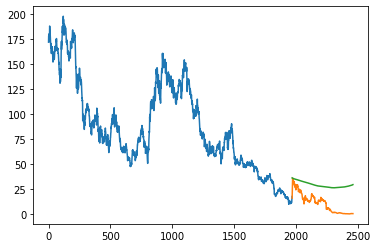

In [17]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])